<h1> Анализ A/B-тест для интернет магазина

Контекст

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.


**Часть 1. Приоритизация гипотез.**
В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами
Reach
Impact
Confidence
Effort.

**Задача**

Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.


**Часть 2. Анализ A/B-теста**

Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

**Задача**

Проанализируйте A/B-тест:

Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.

Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.

Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.

Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

Примите решение по результатам теста и объясните его.
Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.


**Описание данных **

**Данные для первой части**

Файл /datasets/hypothesis.csv. Скачать датасет

- Hypothesis — краткое описание гипотезы;

- Reach — охват пользователей по 10-балльной шкале;

- Impact — влияние на пользователей по 10-балльной шкале;

- Confidence — уверенность в гипотезе по 10-балльной шкале;

Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.


**Данные для второй части**

Файл /datasets/orders.csv. 

- transactionId — идентификатор заказа;

- visitorId — идентификатор пользователя, совершившего заказ;

- date — дата, когда был совершён заказ;

- revenue — выручка заказа;

- group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv. 

- date — дата;

- group — группа A/B-теста;

- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## Предобработка данных .Задача 1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import display
import scipy.stats as stats
import datetime as dt
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 0)

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')#данные для первой части задания
orders = pd.read_csv('/datasets/orders.csv')#данные для второй части задания
visitors = pd.read_csv('/datasets/visitors.csv')#данные для второй части задания

In [3]:
display(hypothesis)
#display(hypothesis['hypothesis'])


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
hypothesis.columns = [x.lower() for x in hypothesis.columns.values] #приведем азвание столбцов к нижнему регистру
#display(hypothesis)

### Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [6]:
hypothesis['ICE']=((hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts'])
display(hypothesis[['hypothesis' , 'ICE']].sort_values(by='ICE', ascending=False))


,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


### Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [7]:
hypothesis['RICE'] = (hypothesis['reach']  *hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
display(hypothesis[['hypothesis' , 'RICE']].sort_values(by='RICE', ascending=False))


,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Вывод**: Мы видим, что для фреймворков ICE и RICE тройка лидеров разные.
Топ 3 ICE:   8,0,7.
Топ 3 RICE:  7,2,0.  
Такая разница обуславливается, тем, что для RICE появляется такой важный параметр как Reach, т.е. сколько пользователей затронет изменение. Поэтому теория №8 c первого места для ICE переместилась на пятое место для RICE видимо потому, что этот метод затронет малое кол-во пользователь. Думаю будет благоразумно дальше работать с теорией 7 и 0, возможно и 2.

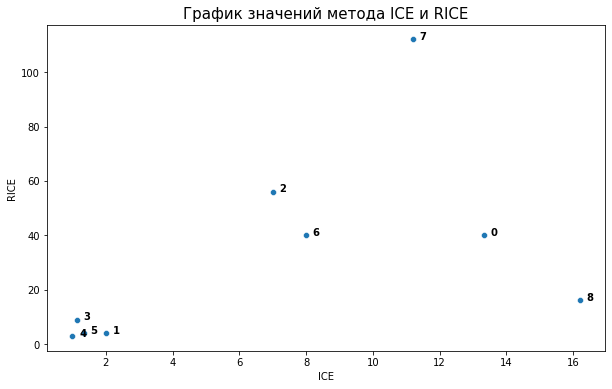

In [8]:
plt.figure(figsize=(10,6))
plt.title('График значений метода ICE и RICE', size=15)
sns.scatterplot(x=hypothesis['ICE'], y=hypothesis['RICE'])
for line in range(0,hypothesis.shape[0]):
     plt.text(hypothesis.ICE[line]+0.2, 
              hypothesis.RICE[line], 
              hypothesis.index[line], 
              horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.show()

## Анализ A/B-теста. Задача 2


### Предобработка  таблицы orders

In [9]:
display(orders)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [11]:
orders["date"] = orders["date"].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d')) #поменяем тип данных date на datetim
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [12]:
orders.duplicated().sum()# проверяем есть ли дупликаты в данных orders

0

### Предобработка  таблицы visitors

In [13]:
display(visitors)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [14]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [15]:
visitors["date"] = visitors["date"].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d')) #поменяем тип данных date на datetim
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [16]:
visitors.duplicated().sum()#проверяем есть ли дупликаты в данных visitors

0

Удалим пользователей, которые попали сразу в две группы.

In [17]:
#orders['visitorId'].count()

In [18]:
inter = np.intersect1d(orders.query('group == "A"')['visitorId'].unique(), orders.query('group == "B"')['visitorId'].unique())
display(inter)
orders = orders[~orders['visitorId'].isin(inter)]

array([   8300375,  199603092,  232979603,  237748145,  276558944,
        351125977,  393266494,  457167155,  471551937,  477780734,
        818047933,  963407295, 1230306981, 1294878855, 1316129916,
       1333886533, 1404934699, 1602967004, 1614305549, 1648269707,
       1668030113, 1738359350, 1801183820, 1959144690, 2038680547,
       2044997962, 2378935119, 2458001652, 2579882178, 2587333274,
       2600415354, 2654030115, 2686716486, 2712142231, 2716752286,
       2780786433, 2927087541, 2949041841, 2954449915, 3062433592,
       3202540741, 3234906277, 3656415546, 3717692402, 3766097110,
       3803269165, 3891541246, 3941795274, 3951559397, 3957174400,
       3963646447, 3972127743, 3984495233, 4069496402, 4120364173,
       4186807279, 4256040402, 4266935830])

In [19]:
#orders['visitorId'].count()

### Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.

In [20]:
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


In [21]:
datesGroups = orders[['date','group']].drop_duplicates()# создаем массив уникальных пар значений дат и групп теста
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]. \
                                     agg({'date' : 'max', 
                                          'group' : 'max', 
                                          'transactionId' : pd.Series.nunique, 
                                          'visitorId' : pd.Series.nunique, 
                                          'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]. \
                                       agg({'date' : 'max', 
                                            'group' : 'max', 
                                            'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']



cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


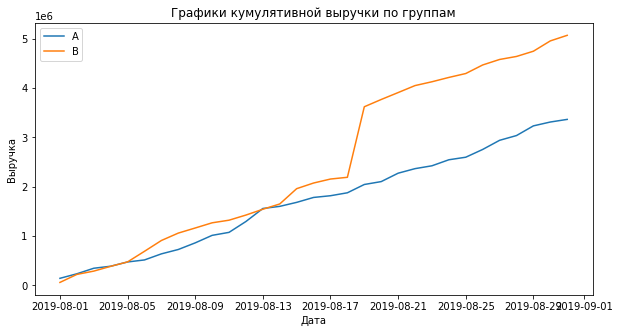

In [22]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
 
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]


plt.figure(figsize=(10,5))
 
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
 
# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.title('Графики кумулятивной выручки по группам')
plt.legend()
plt.show()

**Вывод**:  Выручка растет все время и почти равномерно, это хороший знак. В целом мы видим, что выручка групп **B** больше чем **A**, и общая динамика положительная . Так же видим, что 17 Августа для группы **B** произошел резкий скачок выручки. Скорей всего это были большие заказы, далее выручка продолжает расти равномерно.

### Построим график кумулятивного среднего чека по группам.


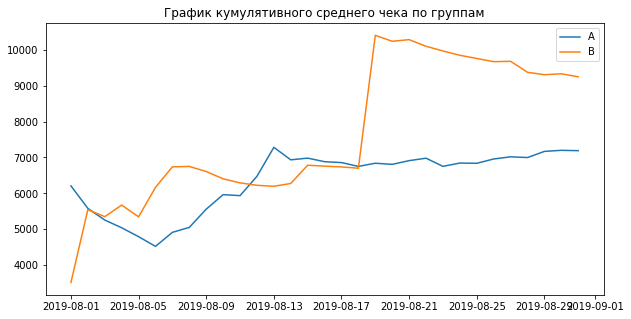

In [23]:
plt.figure(figsize=(10,5))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.legend()


**Вывод**:  В целом видим, что средний чек группы **B** был всегда выше. При этом мы вдиим, что например 13 Августа средний чек группы **А** превышал средний чек группы **B**. Но после этого мы видим аномальное увеличение среднего чека 17 Августа. Возможно, что что то произошло такое, что сначала увеличило средний чек для группы **А**, а затем более мощно для группы **B**.

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

Text(0.5, 1.0, 'График относительного изменения кумулятивного среднего чека группы B к группе A')

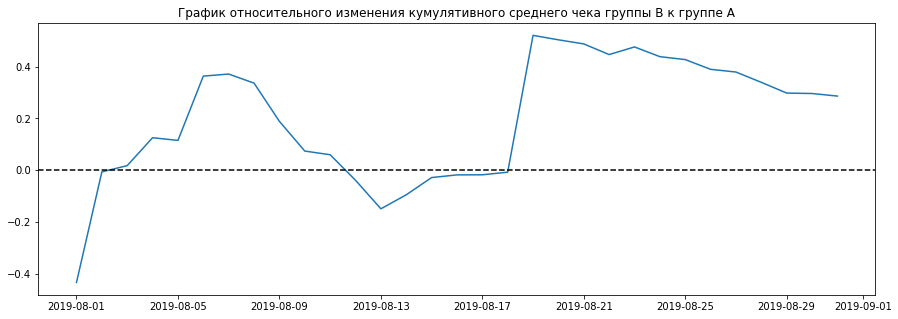

In [24]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,5))
 
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
 
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')


**Вывод**: Мы видим на графике весьма существенные колебания. Скорей всего произошли либо определенные события, либо, что более вероятно, в обоих группах были аномальные пользователи, которые размывали общую картину.

### Построим график кумулятивной конверсии по группам.

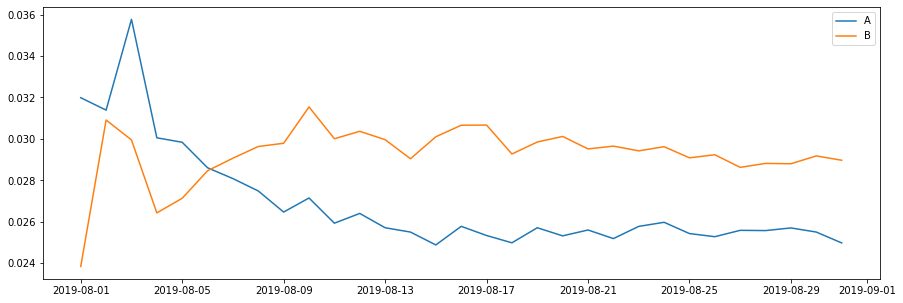

In [25]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
 
# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
 
# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
 
plt.figure(figsize=(15,5))
    
# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()


**Вывод**: Конверсия группы **B** больше чем в группе **А**. При этом видим, что на графике отсутсвуют значимые колебания.

### Построим график относительного изменения кумулятивной конверсии группы B к группе A

No handles with labels found to put in legend.


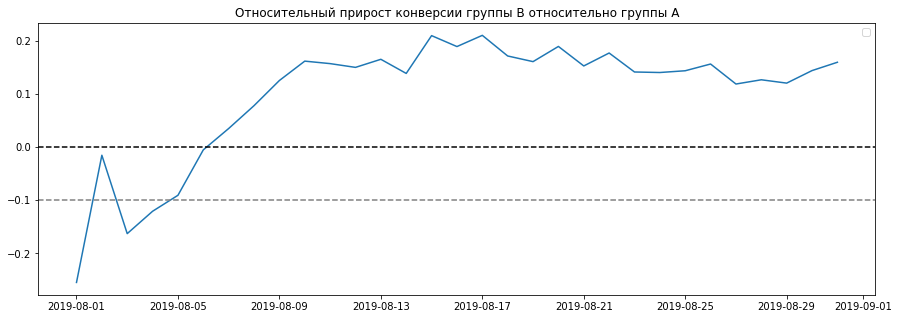

In [26]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15,5))

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, )
plt.title('Относительный прирост конверсии группы B относительно группы A')
plt.legend()

 
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')


**Вывод**: Конверсия группы **B** стабильно больше чем конверсия группы **A**. Это ожидаемо, с учетом предыдущих выводов.

### Построим точечный график количества заказов по пользователям.

In [27]:
orders.head()


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


In [28]:
ordersByUsers = orders.groupby('visitorId', as_index = False).agg({'transactionId': pd.Series.nunique})
ordersByUsers.columns = ['userId', 'orders']
display(ordersByUsers.sort_values(by='orders', ascending=False).head(10))


,userId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


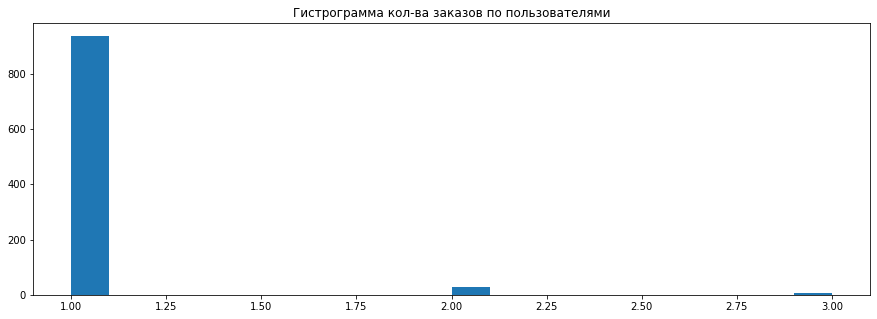

In [29]:
plt.figure(figsize=(15,5))

plt.hist(ordersByUsers['orders'], bins = 20)#строим гистограмму  кол-ва заказов пользователями.
plt.title('Гистрограмма кол-ва заказов по пользователями')
plt.show()



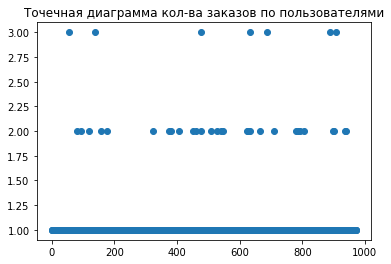

In [30]:
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])#строим точечную диаграмму кол-ва заказов пользователями.
plt.title('Точечная диаграмма кол-ва заказов по пользователями')
plt.show()


**Вывод**  Из диаграмм видим, что в в основном пользователи делали от 1 до 2х заказов. Существуют пользователи, которые делали 3 заказа. Но таких  пользователей очень мало.

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.


In [31]:
percentiles = np.percentile(ordersByUsers['orders'], [95,99])
percentiles 

array([1., 2.])

In [32]:
percentiles = np.percentile(ordersByUsers['orders'], [96,97])
percentiles

array([1., 2.])

**Вывод**  96% пользователей делают всего 1 заказ и лишь только 4% делают 2 заказа(это аномальные заказы). Это не самые хорошие показатели. Думаю необходимо совершить шаги на совершение повторных покупок уже купивших в нашем магазине клиентов.

### Построим точечный график стоимостей заказов. Сделаем выводы и предположения.

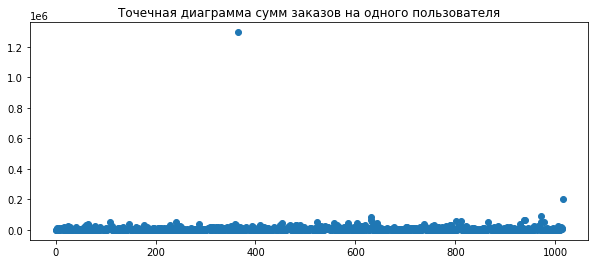

In [33]:
x_values = pd.Series(range(0, len(orders)))
plt.figure(figsize=(10,4))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечная диаграмма сумм заказов на одного пользователя')
plt.show()

**Вывод** Видим единичный заказа на сумму больше чем 1.200.000 млн рублей. Видимо это тот самый аномальный заказ,который мы видели на графиках в разделах 2.3. и 2.4. При этом мы видим, что подавляющее большинство заказов одного пользователя не превышает 200.000 рублей. Посмотрим график поближе. Для этого отсечем заказы выше 200.000 руб.

Text(0.5, 1.0, 'Точечная диаграмма сумм заказов на одного пользователя')

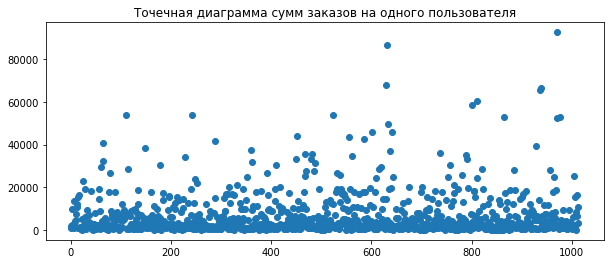

In [34]:
typical_orders = orders[orders['revenue']<200000]['revenue']
xn_values = pd.Series(range(0,len(typical_orders)))
plt.figure(figsize=(10,4))
plt.scatter(xn_values, typical_orders)
plt.title('Точечная диаграмма сумм заказов на одного пользователя')

**Вывод** Видим, что большинство заказов не превышают 20.000 рублей. Более точно сможем определить через процентели.

### Посчитаем 95-й и 99-й перцентили стоимости заказов.

In [35]:
percentiles = np.percentile(orders['revenue'], [95, 99])
percentiles

array([26785., 53904.])

**Вывод** Всего лишь 5% заказов превышают 26.785 рублей и 99% заказов меньше  53.904 рубля. Будем считать эту цифру аномальной.

### Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.

In [36]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']


ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']


data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Проверим теорию, что статистически значимых различий между конверсиями в группах нет. Считаем, что alpha = 0.05

In [37]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
 
sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
 
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
 
print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

                                                        

0.011
0.160


**Вывод** p-valeue меньше чем alpha значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. Конверсия группы **B** превышает конверсию группы **А** на 16%. Это достаточно существенно.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

Чтобы рассчитать статистическую значимость различий в среднем чеке между сегментами, передадим критерию mannwhitneyu() данные о выручке с заказов и найдём относительные различия в среднем чеке между группами.

Будем считать, что нулевая теория это то, что статистически значимых в среднем чеке заказа между группами нет. Альтернативная теория,что различия есть.

In [38]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.829
0.287


In [39]:
#Reviewer's code
import scipy
scipy.__version__
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'],alternative = 'two-sided' )[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.829
0.287


**Вывод** P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. При этом, средний чек группы B значительно выше среднего чека группы A (на ~29% !)

### Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным

Напомним, что найденные в прошлых уроках 95-й и 99-й перцентили средних чеков равны 26.785 и 53.904 рублям. А 95-й и 99-й перцентили количества заказов на одного пользователя равны 1 и 2 заказа на пользователя. считаем аномальными заказы с средним чеком больше 53.904 и кол-вом заказов больше 2-х.

In [40]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'],99)]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'],99)]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'],99)]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape)

1099    148427295
33      249864742
58      611059232
949     887908475
744     888512513
dtype: int64
(16,)


**Вывод** Аномальных  пользователей всего 16 шт.

Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. За нулевую гипотезу возьмём что: "статистически значимых различий в конверсиях между группами нет"


In [41]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 
 
sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [42]:
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered,alternative = 'two-sided')[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.007
0.189


**Вывод** P-value(0.007) < alpha(0.05) значит нулевую теорию мы отвергаем. При этом, конверсия группы B  выше конверсии группы A (на ~19% !)

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.


За нулевую гипотезу возьмём что: "статистически значимых различий в средних чеках между группами нет"; тогда альтернативная гипотеза будет гласить - статистически значимые различия есть.

In [43]:
     
results = stats.mannwhitneyu(orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
                             orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])
display(results.pvalue)

display('{0:.3f}'.format(
orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()\
/orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()-1))
       


0.7877044862440841

'-0.032'

P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия,тоже нет . При этом средний чек группы **B** оказался незначительно (на 3.2%) ниже среднего чека группы **A**. Напомню, для "сырых" данных картина была другой. Там средний чек группы **B** превышал средний чек группы **A** на 29%. Видим, что на общий результат очень сильно повлияли аномальные покупки. 

## Общий вывод

И так мы видим, что и по **"сырым"** и по **"очищенным"** данным конверсия группы **B** больше чем конверсия группы **А**.

- Превышение **В** над **А** для **"Сырых"** данных: **16.0%**

- Превышение **В** над **А** для **"Очищенных"** данных: **18.9%**

Так же есть статистически значимое различие по конверсии между группами как по **"сырым"** данным, так по **"очищенным"**.

Средний чек после очистки его от аномальных  значений (средний чек больше 53.904 рублей и кол-вом заказов больше 2-х.) изменил свою динамику.

- Превышение **В** над **А** для **"Сырых"** данных: **28.7%**

- Превышение **А** над **B** для **"Очищенных"** данных: **3.2%**

Т.е после того как мы убрали крупные продажи (из группы **B**) средние чеки по группам стали примерно одинаковыми.


Можем остановить эксперимент  и считать, что группа **B** более удачна справилась с этим A/B тестом. Хоть средний чек для групп примерно одинаковый(для очищенных данных), мы видим, что конверсия группы **B** значительно лучше и из этой группы приходят люди, которые готовы оставлять аномальные суммы. 